In [27]:
import numpy as np
import pandas as pd
import subprocess as sub
import matplotlib.pyplot as plt
import time

## step 1. Generate sample set by metropolis method

In [45]:
start = time.time()
sub.run(['g++', 'step1_plaquette_eff.cpp', '-o', 'step1_e', '-I/home/hyejin/trng4-4.22', '-L/opt/trng/lib', '-ltrng4', '-std=gnu++11'])
sub.run(['./step1_e'])
print("step1 finished :", time.time()-start)

#Data of Energy&nn in fileout.txt
f = pd.read_csv('fileout_eff.txt', sep = ' ', header = 0)
temp = f.temp[0]
step2 = f.step2[0]
J0 = np.array(f.ene)
J1 = np.array(f.nn)
J2 = np.array(f.nnn)
J3 = np.array(f.nnnn)
num = len(J0)
nth = int(f.nth[0]) #How much consideration of nearest neighbors
Jmat = np.array([J1, J2, J3]).T
target_mat = np.hstack([np.ones((num, 1)), Jmat[:, 0:nth]])
Jlist, err, _, _ = np.linalg.lstsq(target_mat, J0, rcond = None)
print("T =", temp, " Energy, J =", Jlist, " error =", err)

#Data of coefficient in filein.txt
with open("filein_eff.txt", "w") as file:
    file.write('%d\n' %nth)
    file.write('%d\n' %step2)
    file.write('%.10g\n' %temp)
    for i in range (nth + 1):
        data = Jlist[i]
        file.write('%.10g\n' % data)

step1 finished : 43.30117130279541
T = 4.493  Energy, J = [0.96457268 1.07878223]  error = [13359.62961833]


## step 2. optimize J, regenerate sample set by wolff method

In [46]:
sub.run(['g++', 'step2_wolff_eff.cpp', '-o', 'step2_e', '-I/home/hyejin/trng4-4.22', '-L/opt/trng/lib','-ltrng4', '-std=gnu++11'])
for i in range (15):
    start = time.time()
    sub.run(['./step2_e'])
    print("step2 :", time.time()-start)

    #Data of Energy&nn in fileout.txt
    f = pd.read_csv('fileout_eff.txt', sep = ' ', header = 0)
    temp = f.temp[0]
    step2 = f.step2[0]
    J0 = np.array(f.ene)
    J1 = np.array(f.nn)
    J2 = np.array(f.nnn)
    J3 = np.array(f.nnnn)
    num = len(J0)
    nth = int(f.nth[0]) #How much consideration of nearest neighbors
    Jmat = np.array([J1, J2, J3]).T
    target_mat = np.hstack([np.ones((num, 1)), Jmat[:, 0:nth]])
    Jlist, err, _, _ = np.linalg.lstsq(target_mat, J0, rcond = None)
    print("T =", temp, " Energy, J =", Jlist, " error =", err)
    #Data of coefficient in filein.txt
    with open("filein_eff.txt", "w") as file:
        file.write('%d\n' %nth)
        file.write('%d\n' %step2)
        if temp>2.5: file.write('%.10g\n' %temp)
        else: file.write('%.10g\n' %(temp+0.2))
        for i in range (nth + 1):
            data = Jlist[i]
            file.write('%.10g\n' % data)

step2 : 103.46637415885925
T = 4.293  Energy, J = [1.08146967 1.0810676 ]  error = [12875.87807928]
step2 : 93.6120913028717
T = 4.093  Energy, J = [1.42494159 1.08690973]  error = [12495.97986684]
step2 : 78.74779772758484
T = 3.8930000000000002  Energy, J = [1.47512901 1.08885673]  error = [11959.99132775]
step2 : 65.78911280632019
T = 3.693  Energy, J = [1.59919749 1.09112031]  error = [11656.15308677]
step2 : 56.59574103355408
T = 3.4930000000000003  Energy, J = [2.01446192 1.09724566]  error = [10840.3891435]
step2 : 43.15050983428955
T = 3.293  Energy, J = [2.06704471 1.09848338]  error = [9911.12984424]
step2 : 34.03681802749634
T = 3.093  Energy, J = [2.16430204 1.10040607]  error = [9153.58229975]
step2 : 19.095218896865845
T = 2.8930000000000002  Energy, J = [2.43271466 1.10315214]  error = [8377.00406993]
step2 : 5.285279035568237
T = 2.693  Energy, J = [2.68923176 1.10576477]  error = [6748.01983214]
step2 : 5.257397174835205
T = 2.4930000000000003  Energy, J = [3.60455864 

## step 4. Compare energy

In [ ]:
start = time.time()
sub.run(['g++', 'step4_ene_eff.cpp', '-o', 'step4_e', '-I/home/hyejin/trng4-4.22', '-L/opt/trng/lib', '-ltrng4', '-std=gnu++11'])
sub.run(['./step4_e'])
print("step4 :", time.time()-start)

In [ ]:
p = pd.read_csv('../../python/txtfiles-6/plot_ene/p10_e.txt', sep=' ', header=0)
fit = pd.read_csv('ene_eff.txt', sep = ' ', header = 1)
print("Plaquette & Fitted of L =", 10)

R2 = 1 - np.sum((np.array(fit.e) - np.array(p.e))**2) / np.sum((fit.e - np.average(fit.e))**2)
plt.plot(fit.e, p.e, '.', markersize = 3, label = R2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('effective', fontsize=12)
plt.ylabel('original', fontsize=12)
plt.legend()
plt.show()

plt.plot(np.array(fit.e) - np.array(p.e))**2, '.', markersize = 3)
plt.xlabel('T', fontsize=12)
plt.ylabel('diff', fontsize=12)
plt.legend()
plt.show()

## step 3. Compare magnetization

In [30]:
start = time.time()
sub.run(['g++', 'step3_plot_eff.cpp', '-o', 'step3_e', '-I/home/hyejin/trng4-4.22', '-L/opt/trng/lib', '-ltrng4', '-std=gnu++11'])
sub.run(['./step3_e'])
print("step3 :", time.time()-start)

step3 : 27267.45780801773


Plaquette & Fitted of L=10


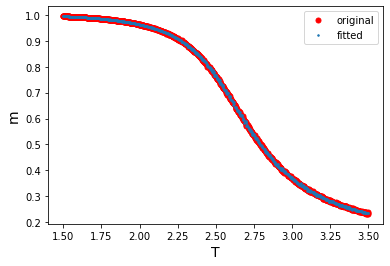

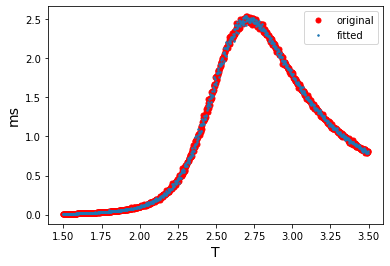

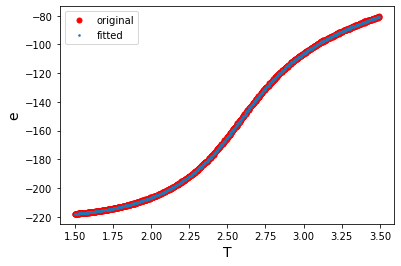

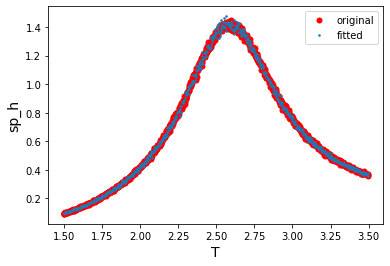

In [31]:
cols = ['m', 'ms', 'e', 'sp_h']
p = pd.read_csv('../../python/txtfiles-5/p10.txt', sep=' ', header=0)
fit = pd.read_csv('plot_eff.txt', sep = ' ', header = 1)

print("Plaquette & Fitted of L=10")

for j in range (4):
    plt.plot(p.temperature, p[cols[j]], 'r.', markersize = 10, markerfacecolor = None, linestyle = 'None', label = 'original')
    plt.plot(fit.temperature[fit.temperature>=1.5], fit[cols[j]][fit.temperature>=1.5], '.', markersize = 3, label = 'fitted')
    plt.xlabel('T', fontsize=14)
    plt.ylabel(cols[j], fontsize=14)
    plt.legend()
    plt.show()